In [1]:
import os
import sys
import numpy as np
from scipy import sparse
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy.cluster import hierarchy
import seaborn as sns
import spacy
import nltk
from konlpy.tag import Okt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


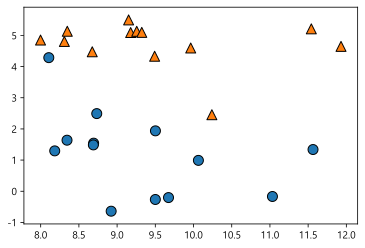

In [4]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

(-3.0, 3.0)

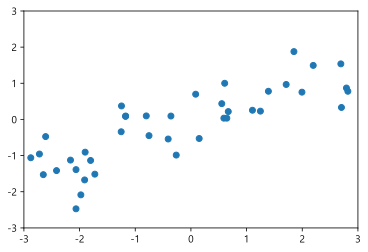

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

In [6]:
cancer = load_breast_cancer()
cancer.keys(), cancer['target_names'], cancer['feature_names'], cancer['data'].shape

(dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']),
 array(['malignant', 'benign'], dtype='<U9'),
 array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error', 'worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension'], dtype='<U23'),
 (569, 30))

In [7]:
cancer['data'].shape

(569, 30)

In [8]:
{name: v for name, v in zip(cancer['target_names'], np.bincount(cancer['target']))}

{'malignant': 212, 'benign': 357}

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


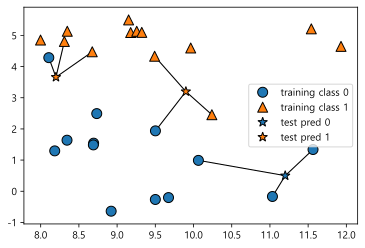

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [11]:
knn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_clf.predict(X_test), y_test, np.mean(knn_clf.predict(X_test) == y_test), knn_clf.score(X_test, y_test)

(array([1, 0, 1, 0, 1, 0, 0]),
 array([1, 0, 1, 0, 1, 1, 0]),
 0.8571428571428571,
 0.8571428571428571)

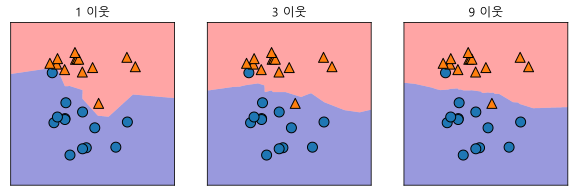

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbor, ax in zip([1, 3, 9], axs):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(knn_clf, X, fill=True, alpha=0.4, ax=ax)
    ax.set_title(f'{n_neighbor} 이웃')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=66)

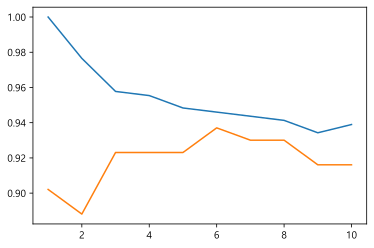

In [14]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbor in neighbors_settings:
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train, y_train)
    training_accuracy.append(knn_clf.score(X_train, y_train))
    test_accuracy.append(knn_clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy)
plt.plot(neighbors_settings, test_accuracy)

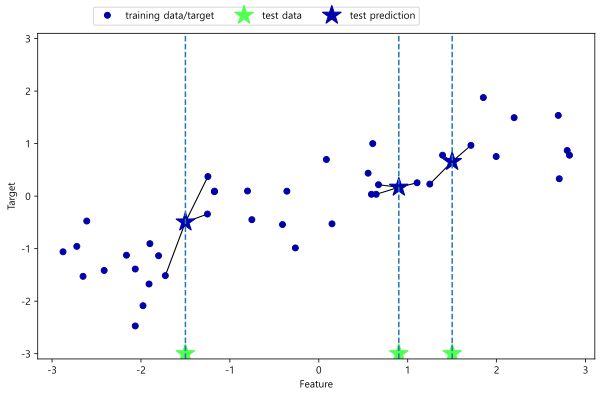

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
knn_reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
knn_reg.predict(X_test), knn_reg.score(X_test, y_test)

(array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
        -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398]),
 0.8344172446249605)

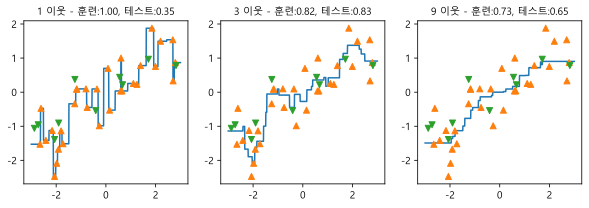

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbor, ax in zip([1, 3, 9], axs):
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbor).fit(X_train, y_train)
    ax.plot(line, knn_reg.predict(line))
    ax.plot(X_train, y_train, '^')
    ax.plot(X_test, y_test, 'v')
    ax.set_title(f'{n_neighbor} 이웃 - 훈련:{knn_reg.score(X_train, y_train):.2f}, 테스트:{knn_reg.score(X_test, y_test):.2f}', fontsize=10)

w[0]: 0.393906  b: -0.031804


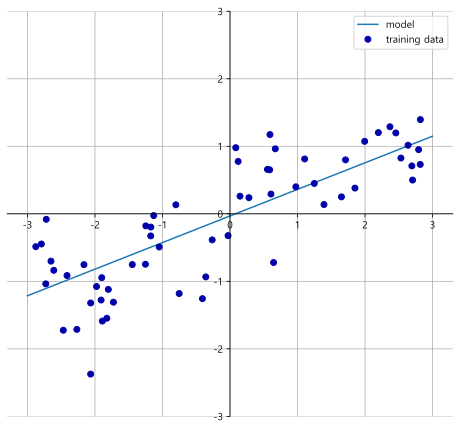

In [19]:
mglearn.plots.plot_linear_regression_wave()

In [20]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6700890315075756, 0.65933685968637)

In [22]:
lr.coef_, lr.intercept_

(array([0.39390555]), -0.031804343026759746)

In [23]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [24]:
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9520519609032729, 0.6074721959665842)

In [25]:
lr.coef_, lr.intercept_

(array([-4.12710947e+02, -5.22432068e+01, -1.31898815e+02, -1.20041365e+01,
        -1.55107129e+01,  2.87163342e+01,  5.47040992e+01, -4.95346659e+01,
         2.65823927e+01,  3.70620316e+01, -1.18281674e+01, -1.80581965e+01,
        -1.95246830e+01,  1.22025403e+01,  2.98078144e+03,  1.50084257e+03,
         1.14187325e+02, -1.69700520e+01,  4.09613691e+01, -2.42636646e+01,
         5.76157466e+01,  1.27812142e+03, -2.23986944e+03,  2.22825472e+02,
        -2.18201083e+00,  4.29960320e+01, -1.33981515e+01, -1.93893485e+01,
        -2.57541277e+00, -8.10130128e+01,  9.66019367e+00,  4.91423718e+00,
        -8.12114800e-01, -7.64694179e+00,  3.37837099e+01, -1.14464390e+01,
         6.85083979e+01, -1.73753604e+01,  4.28128204e+01,  1.13988209e+00,
        -7.72696840e-01,  5.68255921e+01,  1.42875996e+01,  5.39551110e+01,
        -3.21709644e+01,  1.92709675e+01, -1.38852338e+01,  6.06343266e+01,
        -1.23153942e+01, -1.20041365e+01, -1.77243899e+01, -3.39868183e+01,
         7.0

In [26]:
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.8857966585170941, 0.7527683481744758)

In [27]:
ridge.coef_, ridge.intercept_

(array([-1.41368408e+00, -1.55661895e+00, -1.46543409e+00, -1.26616071e-01,
        -7.91193605e-02,  8.33161023e+00,  2.54975060e-01, -4.94145701e+00,
         3.89862268e+00, -1.05866058e+00, -1.58433734e+00,  1.05103856e+00,
        -4.01220799e+00,  3.33720475e-01,  3.64725471e-03, -8.49295793e-01,
         7.44989267e-01, -1.43106836e+00, -1.62981017e+00, -1.40486294e+00,
        -4.47314366e-02, -1.74619880e+00, -1.46715888e+00, -1.33237111e+00,
        -1.69154625e+00, -5.06179637e-01,  2.62197591e+00, -2.09210002e+00,
         1.95074661e-01, -2.75469422e-01,  5.11308202e+00, -1.67083739e+00,
        -9.81863179e-02,  6.34477127e-01, -6.10008281e-01,  4.01805897e-02,
        -1.27661999e+00, -2.91349679e+00,  3.39544035e+00,  7.91904036e-01,
         1.35260232e+00, -4.03661265e+00,  2.32361734e+00, -3.36712926e+00,
         1.81279204e+00,  3.01566897e+00, -1.89452070e+00, -2.50844073e-01,
        -2.89543735e+00, -1.26616071e-01, -5.00217192e+00, -2.43951806e+00,
         2.8

In [28]:
param_grid = {'alpha':[0.05, 0.1, 0.2, 0.5, 1]}
grid = GridSearchCV(Ridge(solver='saga'), param_grid=param_grid, cv=5).fit(X, y)
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'alpha': 1}, 0.6680224162595728, 0.7916076355685184)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

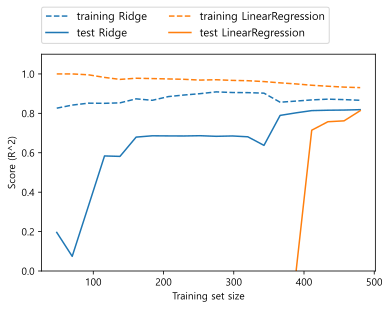

In [29]:
mglearn.plots.plot_ridge_n_samples()

In [30]:
lasso = Lasso().fit(X_train, y_train)
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.29323768991114596, 0.20937503255272272)

In [31]:
param_grid = {'alpha':[0.01, 0.05, 0.1]}
grid = GridSearchCV(Lasso(max_iter=50000), param_grid=param_grid, cv=5).fit(X, y)
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'alpha': 0.05}, 0.5914760567996851, 0.7189904781687619)

In [32]:
np.sum(grid.best_estimator_.coef_ != 0)

18

In [33]:
elastic = ElasticNet(l1_ratio=0.5).fit(X_train, y_train)
elastic.score(X_train, y_train), elastic.score(X_test, y_test)

(0.32837814485847905, 0.2217004367773665)

In [34]:
param_grid = {'alpha':[0.005, 0.01, 0.05, 0.1], 'l1_ratio':[0.3, 0.5, 0.7]}
grid = GridSearchCV(ElasticNet(max_iter=10000), param_grid=param_grid, cv=3).fit(X, y)
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'alpha': 0.005, 'l1_ratio': 0.7}, 0.5529206195779488, 0.7893136964463625)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


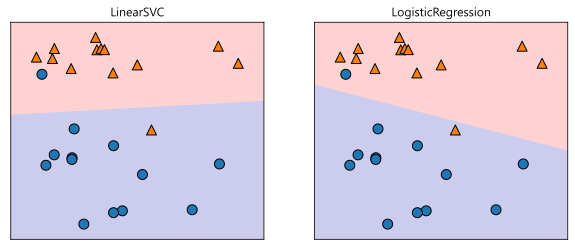

In [35]:
X, y = mglearn.datasets.make_forge()
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axs):
    clf = model.fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, alpha=0.2, ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')

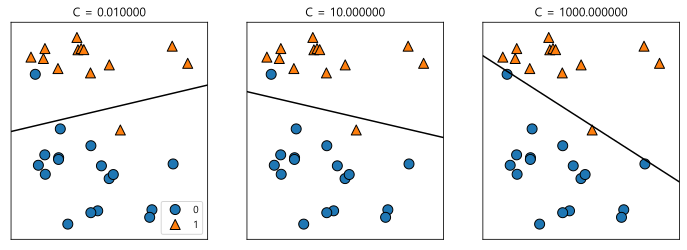

In [36]:
mglearn.plots.plot_linear_svc_regularization()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

In [38]:
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9577464788732394, 0.958041958041958)

In [39]:
logreg = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.9835680751173709, 0.972027972027972)

In [40]:
logreg_l1 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=5000, C=100).fit(X_train, y_train)
logreg_l1.score(X_train, y_train), logreg_l1.score(X_test, y_test)

(0.9859154929577465, 0.9790209790209791)

In [42]:
param_grid = {'solver':['lbgfs', 'liblinear', 'saga'], 'penalty':['l1', 'l2'], 'C':[10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=5000, random_state=0), param_grid=param_grid, cv=3).fit(cancer['data'], cancer['target'])
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
12 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError(
Valu

({'C': 100, 'penalty': 'l1', 'solver': 'liblinear'},
 0.9613385315139701,
 0.986013986013986)

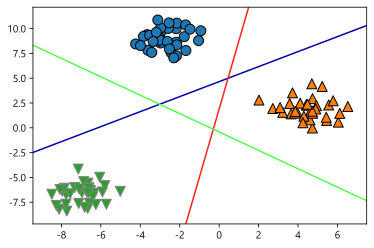

In [43]:
X, y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X, y)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], color)

In [44]:
linear_svm.coef_

array([[-0.17492001,  0.23140737],
       [ 0.47621789, -0.06936576],
       [-0.18914523, -0.20399703]])

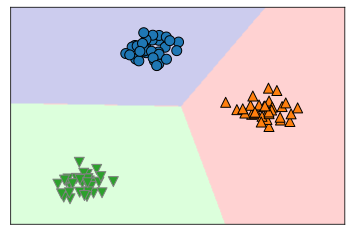

In [45]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

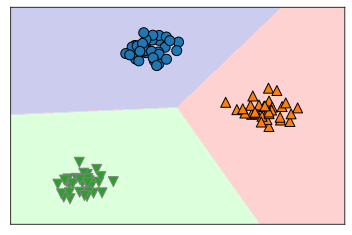

In [46]:
sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive', eta0=0.1, random_state=42, n_jobs=-1).fit(X, y)
mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=0.2)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [47]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=42)

In [48]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0).fit(X_train, y_train)
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.9882629107981221, 0.951048951048951)

In [49]:
param_grid = {'ccp_alpha':[0.001, 0.003, 0.005, 0.007]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid).fit(cancer['data'], cancer['target'])
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'ccp_alpha': 0.003}, 0.9243906225741345, 0.9790209790209791)

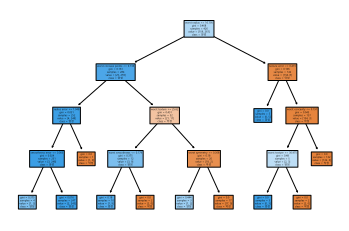

In [50]:
plot_tree(tree, class_names=['악성', '양성'], feature_names=cancer['feature_names'], filled=True)
plt.show()

In [51]:
def plot_feature_importances(model, dataset):
    n_features = dataset['data'].shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dataset['feature_names'])
    plt.ylim(-1, n_features)

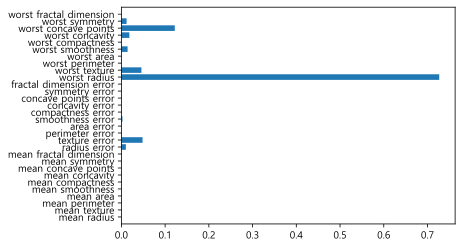

In [52]:
plot_feature_importances(tree, cancer)

In [53]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

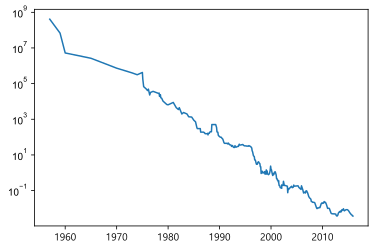

In [54]:
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices['date'], ram_prices['price'])

In [55]:
data_train = ram_prices[ram_prices['date'] < 2000]
data_test = ram_prices[ram_prices['date'] >= 2000]
X_train = data_train['date'].values.reshape(-1, 1)
y_train = np.log(data_train['price'])

In [56]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linreg = LinearRegression().fit(X_train, y_train)
X_all = ram_prices['date'].values.reshape(-1, 1)
pred_tree = tree.predict(X_all)
pred_lin = linreg.predict(X_all)
price_tree = np.exp(pred_tree)
price_lin = np.exp(pred_lin)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


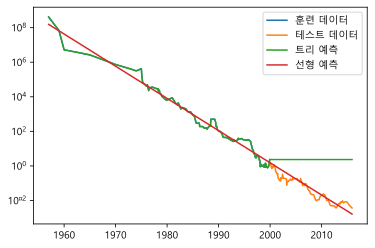

In [57]:
plt.semilogy(data_train['date'], data_train['price'], label='훈련 데이터')
plt.semilogy(data_test['date'], data_test['price'], label='테스트 데이터')
plt.semilogy(ram_prices['date'], price_tree, label='트리 예측')
plt.semilogy(ram_prices['date'], price_lin, label='선형 예측')
plt.legend()

In [58]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [59]:
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1).fit(X_train, y_train)

In [61]:
forest.score(X_test, y_test)

0.972027972027972

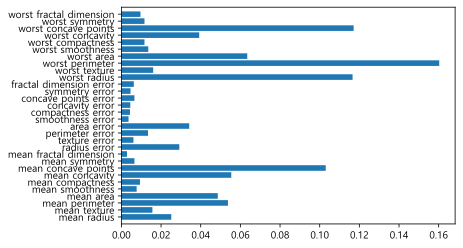

In [62]:
plot_feature_importances(forest, cancer)

In [63]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1).fit(X_train, y_train)

In [64]:
gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.9906103286384976, 0.972027972027972)

In [65]:
param_grid = {'max_depth':[1, 2, 3], 'learning_rate':[0.001, 0.01, 0.1]}
grid = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=param_grid, cv=3).fit(cancer['data'], cancer['target'])
grid.best_params_, grid.best_score_, grid.score(X_test, y_test)

({'learning_rate': 0.1, 'max_depth': 1}, 0.9613292490485472, 0.993006993006993)

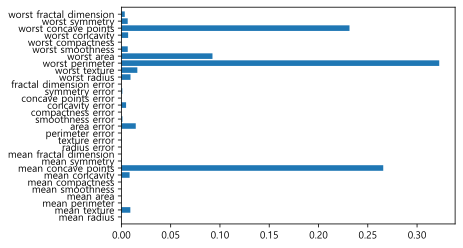

In [66]:
plot_feature_importances(gbrt, cancer)